In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
from algorithms import fixed_bitwidth
from model_gen import inception_cnn

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import pickle

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [2]:
input_shape = (96, 96, 3)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/cifar_df2/model_32_0.75_w.h5'
output_path = 'C:/Users/320060820/experiments/outputs/Comp_Dependent_Optimized_Search/DF CIFAR10/'
name = 'cifar_df'

from test_models.cifar_df2 import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=True, 
                                        pool_layer_type='max', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]
print(float_model_acc)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
0.7452


In [3]:
opt_params = {}
quant_model, opt_params['activations'], acc_drop = fixed_bitwidth.evaluate_quantized_activations(model_arch, name, 
                                                                                                 test_data, 
                                                                                                 float_model_acc,
                                                                                                 bitwidth=8)

quant_model, opt_params['weights'], opt_params['biases'], a = fixed_bitwidth.evaluate_quantized_weights(quant_model, 
                                                                                                        float_model_acc, 
                                                                                                        bitwidth=8)
acc_drop = {**acc_drop, **a}
print(acc_drop)

Original network's accuracy: 0.7452
Quantized network's accuracy: 0.7434
Accuracy drop: 0.242 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.7418
Accuracy drop: 0.456 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.7434
Accuracy drop: 0.242 %
{'activations': 0.24154589371980997, 'weights': 0.4562533548040739, 'biases': 0.24154589371980997}


In [4]:
input_shape = (96, 96, 1)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/fashion_df/fashion_df.h5'
output_path = 'C:/Users/320060820/experiments/outputs/Comp_Dependent_Optimized_Search/DF Fashion/'
name = 'fashion_df'

from test_models.fashion_df import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=True, 
                                        pool_layer_type='max', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]
print(float_model_acc)

0.9106


In [5]:
opt_params = {}
quant_model, opt_params['activations'], acc_drop = fixed_bitwidth.evaluate_quantized_activations(model_arch, name, 
                                                                                                 test_data, 
                                                                                                 float_model_acc,
                                                                                                 bitwidth=8)

quant_model, opt_params['weights'], opt_params['biases'], a = fixed_bitwidth.evaluate_quantized_weights(quant_model, 
                                                                                                        float_model_acc, 
                                                                                                        bitwidth=8)
acc_drop = {**acc_drop, **a}
print(acc_drop)

Original network's accuracy: 0.9106
Quantized network's accuracy: 0.9105
Accuracy drop: 0.011 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.9106
Quantized network's accuracy: 0.9064
Accuracy drop: 0.461 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.905
Accuracy drop: 0.615 %
{'activations': 0.010981770261364925, 'weights': 0.4612343509773756, 'biases': 0.6149791346364966}


In [6]:
input_shape = (96, 96, 1)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/mnist_df/inception_v3_model_batchnorm_w.h5'
output_path = 'C:/Users/320060820/experiments/outputs/Comp_Dependent_Optimized_Search/DF MNIST/'
name = 'mnist_df'
total_acc_drop = 0.005

from test_models.mnist_df import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=False, 
                                        pool_layer_type='average', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]
print(float_model_acc)

0.9808


In [7]:
opt_params = {}
quant_model, opt_params['activations'], acc_drop = fixed_bitwidth.evaluate_quantized_activations(model_arch, name, 
                                                                                                 test_data, 
                                                                                                 float_model_acc,
                                                                                                 bitwidth=8)

quant_model, opt_params['weights'], opt_params['biases'], a = fixed_bitwidth.evaluate_quantized_weights(quant_model, 
                                                                                                        float_model_acc, 
                                                                                                        bitwidth=8)
acc_drop = {**acc_drop, **a}
print(acc_drop)

Original network's accuracy: 0.9808
Quantized network's accuracy: 0.9808
Accuracy drop: 0.000 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.9808
Quantized network's accuracy: 0.9802
Accuracy drop: 0.061 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.9807
Accuracy drop: 0.010 %
{'activations': 0.0, 'weights': 0.061174551386627744, 'biases': 0.010195758564436072}


In [8]:
input_shape = (96, 96, 3)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/svhn_df/svhn_df_w.h5'
output_path = 'C:/Users/320060820/experiments/outputs/Comp_Dependent_Optimized_Search/DF SVHN/'
name = 'svhn_df'
total_acc_drop = 0.005

from test_models.svhn_df import data
_, test_data = data.get_data()

model_arch = inception_cnn.InceptionCNN(input_shape, num_outputs, dropout=True, 
                                        pool_layer_type='max', path_trained_weights=path_trained_weights)
model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]
print(float_model_acc)

0.921980639213276


In [9]:
opt_params = {}
quant_model, opt_params['activations'], acc_drop = fixed_bitwidth.evaluate_quantized_activations(model_arch, name, 
                                                                                                 test_data, 
                                                                                                 float_model_acc,
                                                                                                 bitwidth=8)

quant_model, opt_params['weights'], opt_params['biases'], a = fixed_bitwidth.evaluate_quantized_weights(quant_model, 
                                                                                                        float_model_acc, 
                                                                                                        bitwidth=8)
acc_drop = {**acc_drop, **a}
print(acc_drop)

Original network's accuracy: 0.921980639213276
Quantized network's accuracy: 0.9140288875230486
Accuracy drop: 0.862 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.921980639213276
Quantized network's accuracy: 0.9158343577135832
Accuracy drop: 0.667 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.9141441303011678
Accuracy drop: 0.850 %
{'activations': 0.8624640639973362, 'weights': 0.6666388900462563, 'biases': 0.8499645848089675}


In [2]:
keys = ['DF CIFAR10', 'DF Fashion', 'DF MNIST', 'DF SVHN', 'Sequential CIFAR10', 'Sequential Fashion',
        'Sequential MNIST', 'Sequential SVHN']
opts_results = np.array([0.009930220075147562, 0.009663957830002108, 0.00988988580750412, 
                         0.00995791842006585, 0.0077641635326944946, 0.009084027252081716,
                         0.00984924623115581, 0.009779852698514871]) * 100
fbw_results = np.array([0.0024154589371980997, 0.006149791346364966, 0.00010195758564436072, 0.008499645848089675,
                        0.003396821545553833, 0.001946577268303139, -0.000100502512562803, 0.0014488670664465875]) * 100

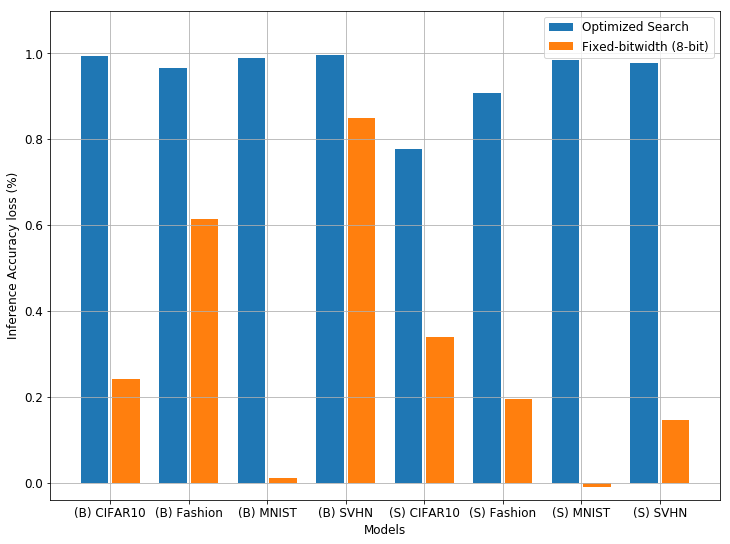

In [14]:
global_save = 'C:/Users/320060820/OneDrive - Philips/Thesis docs/Thesis/Images/Final results/'
plt.rcParams.update({'font.size': 12, 'font.weight':520})
plt.figure(figsize=(12, 9))
x1 = np.arange(1, 9, 1)
width = 0.35
x2 = x1 + width + 0.05
plt.bar(x1, opts_results, width, color='tab:blue', label='Optimized Search')
plt.bar(x2, fbw_results, width, color='tab:orange', label='Fixed-bitwidth (8-bit)')

x3 = x1 + (width + 0.05) / 2
lab = [('(S) ' + x.split(' ')[1]) if x.startswith('Sequential') else ('(B) ' + x.split(' ')[1]) for x in keys]
plt.xticks(x3, lab)
plt.grid()
plt.legend()
plt.ylim(fbw_results.min()-0.03, 1.1)
plt.xlabel('Models')
plt.ylabel('Inference Accuracy loss (%)')
plt.savefig(global_save + 'acc_loss_comp.png', bbox_inches='tight')